In [1]:
data_filename = 'day13_dots.txt'
with open(data_filename) as datafile:
    dots = [l.strip() for l in datafile.readlines()]

dots = [coords.split(',') for coords in dots]
dots = [tuple(int(c) for c in dot) for dot in dots]

In [2]:
data_filename2 = 'day13_folding.txt'
with open(data_filename2) as datafile:
    instructions = [l.strip() for l in datafile.readlines()]

In [3]:
instructions

['fold along x=655',
 'fold along y=447',
 'fold along x=327',
 'fold along y=223',
 'fold along x=163',
 'fold along y=111',
 'fold along x=81',
 'fold along y=55',
 'fold along x=40',
 'fold along y=27',
 'fold along y=13',
 'fold along y=6']

# Part 1

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
dots = np.array(dots)
dots[:10]

array([[ 797,  352],
       [  70,  595],
       [1049,  372],
       [ 887,  710],
       [ 774,  607],
       [ 581,  348],
       [ 827,  238],
       [ 341,    1],
       [1295,  858],
       [1017,  854]])

In [6]:
# Do this automatically
paper = np.zeros((1311, 895)).astype(bool)
paper[list(zip(*dots))] = True

<ipython-input-6-eeb13999d3ec>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paper[list(zip(*dots))] = True


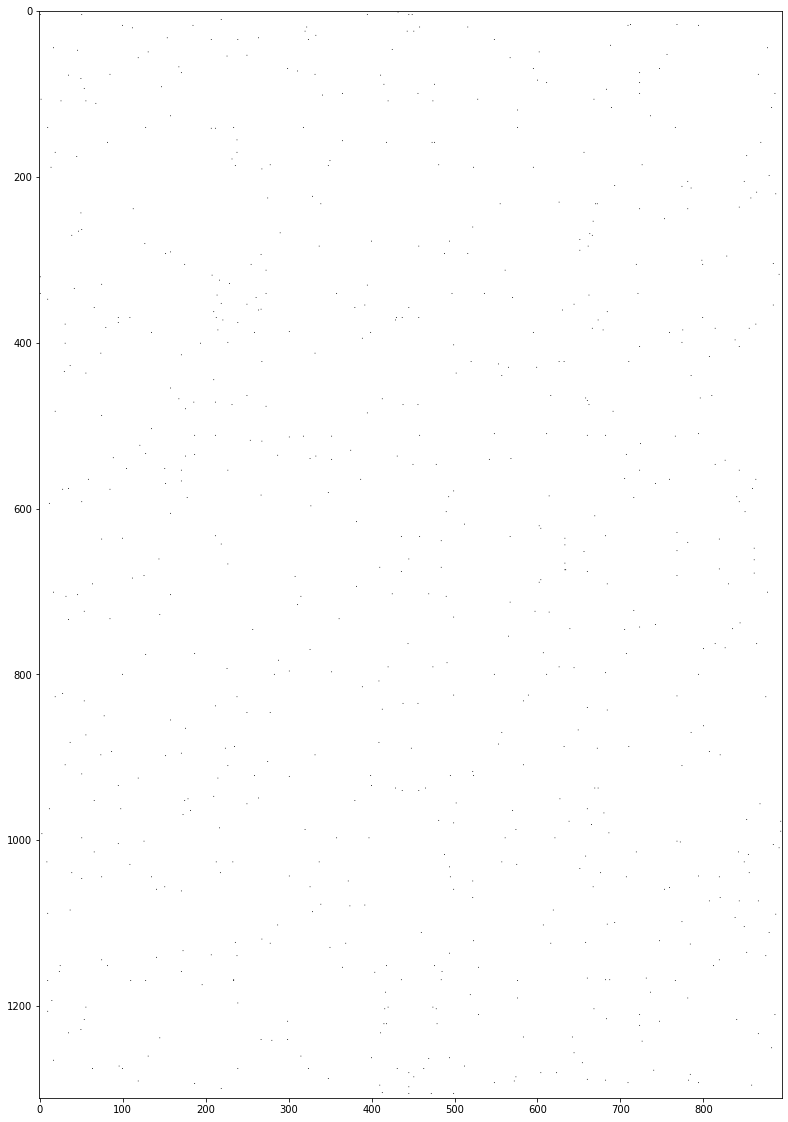

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(paper, cmap='gray_r')

### Wrong coordinates!

In [8]:
# First fold
print(instructions[0])

fold along x=655


In [9]:
x = 655

fold = paper[x+1:, :]
paper = paper[:x, :]

In [10]:
paper.shape

(655, 895)

In [11]:
fold.shape

(655, 895)

In [12]:
paper |= np.flip(fold, axis=0)

In [13]:
paper.sum()

592

# Part 2

In [14]:
foldings = [i.split(' ')[-1].split('=') for i in instructions]

In [15]:
# Do this automatically
paper = np.zeros((1311, 895)).astype(bool)
paper[list(zip(*dots))] = True

for axis, val in foldings:
    val = int(val)
    if axis == 'x':
        fold = paper[val+1:, :]
        paper = paper[:val, :]
        paper |= np.flip(fold, axis=0)
    else:
        fold = paper[:, val+1:]
        paper = paper[:, :val]
        paper |= np.flip(fold, axis=1)

<ipython-input-15-871147e01124>:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  paper[list(zip(*dots))] = True


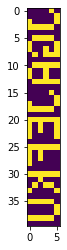

In [17]:
plt.imshow(paper)

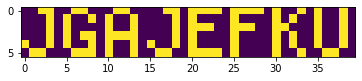

In [16]:
plt.imshow(paper.T)